In [48]:
!pip install --quiet nltk

In [49]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import nltk
nltk.download("all", quiet=True)

True

In [50]:
#https://www.gutenberg.org/

In [51]:
url = "https://www.gutenberg.org/files/43/43-h/43-h.htm"

In [52]:
req = requests.get(url)

In [53]:
type(req)

requests.models.Response

In [54]:
html = req.text

In [55]:
soup = BeautifulSoup(html, "html5lib")

In [56]:
type(soup)

bs4.BeautifulSoup

In [57]:
soup.title.string

'The Strange Case Of Dr. Jekyll And Mr. Hyde, by Robert Louis Stevenson'

In [58]:
soup.findAll("a")

[<a href="#chap01">STORY OF THE DOOR</a>,
 <a href="#chap02">SEARCH FOR MR. HYDE</a>,
 <a href="#chap03">DR. JEKYLL WAS QUITE AT EASE</a>,
 <a href="#chap04">THE CAREW MURDER CASE</a>,
 <a href="#chap05">INCIDENT OF THE LETTER</a>,
 <a href="#chap06">INCIDENT OF DR. LANYON</a>,
 <a href="#chap07">INCIDENT AT THE WINDOW</a>,
 <a href="#chap08">THE LAST NIGHT</a>,
 <a href="#chap09">DR. LANYON’S NARRATIVE</a>,
 <a href="#chap10">HENRY JEKYLL’S FULL STATEMENT OF THE CASE</a>,
 <a name="chap01"></a>,
 <a name="chap02"></a>,
 <a name="chap03"></a>,
 <a name="chap04"></a>,
 <a name="chap05"></a>,
 <a name="chap06"></a>,
 <a name="chap07"></a>,
 <a name="chap08"></a>,
 <a name="chap09"></a>,
 <a name="chap10"></a>]

In [59]:
text = soup.get_text()

In [60]:
tokenizer = nltk.tokenize.RegexpTokenizer("\w+")

In [61]:
tokens = tokenizer.tokenize(text)

In [62]:
tokens[:9]

['The', 'Strange', 'Case', 'Of', 'Dr', 'Jekyll', 'And', 'Mr', 'Hyde']

In [63]:
len(tokens)

29329

In [64]:
words = []

In [65]:
for word in tokens:
  words.append(word.lower())

In [66]:
words[:9]

['the', 'strange', 'case', 'of', 'dr', 'jekyll', 'and', 'mr', 'hyde']

In [67]:
sw = nltk.corpus.stopwords.words("english")

In [68]:
len(sw)

179

In [69]:
words2 = []

In [70]:
for word in words:
  if word not in sw:
    words2.append(word)

In [71]:
words2[:7]

['strange', 'case', 'dr', 'jekyll', 'mr', 'hyde', 'robert']

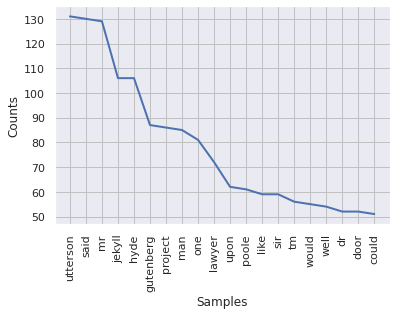

In [72]:
sns.set(color_codes=True)
freqDist = nltk.FreqDist(words2)
freqDist.plot(20)

In [73]:
def plot_words(url):
  req = requests.get(url)
  html = req.text
  soup = BeautifulSoup(html, "html5lib")
  text = soup.get_text()
  tokenizer = nltk.tokenize.RegexpTokenizer("\w+")
  tokens = tokenizer.tokenize(text)
  words = []
  for word in tokens:
    words.append(word.lower())
  sw = nltk.corpus.stopwords.words("english")
  words2 = []
  for word in words:
    if word not in sw:
      words2.append(word)
  freqDist = nltk.FreqDist(words2)
  freqDist.plot(20)

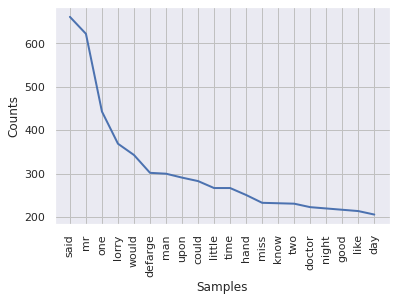

In [74]:
plot_words("https://www.gutenberg.org/files/98/98-h/98-h.htm")

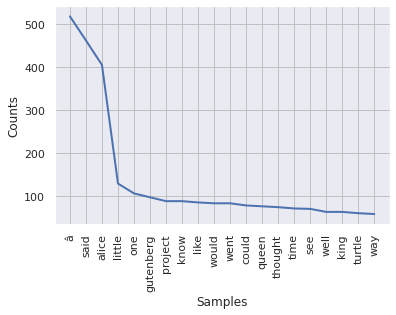

In [75]:
plot_words("https://www.gutenberg.org/files/11/11-h/11-h.htm")

In [112]:
#install needed
!pip install --quiet nltk

In [113]:
import random

#importing and downloading everything at once, may take a few minutes
import nltk
nltk.download("all", quiet=True)

True

In [114]:
documents = [(list(nltk.corpus.movie_reviews.words(fileid)), category)
              for category in nltk.corpus.movie_reviews.categories()
              for fileid in nltk.corpus.movie_reviews.fileids(category)]

In [115]:
random.shuffle(documents)

In [116]:
print(documents[0])

(['i', 'wish', 'i', 'could', 'have', 'been', 'in', 'the', 'pitch', 'meeting', 'for', 'this', 'ridiculous', 'notion', 'of', 'a', 'sports', 'film', '.', 'i', 'bet', 'it', 'was', 'some', 'hotshot', 'warner', 'brothers', 'agent', 'with', 'an', 'dark', 'armani', 'suit', 'and', 'manicured', 'fingernails', 'saying', ',', '"', 'it', 'would', 'be', 'a', 'very', 'light', 'comedic', 'version', 'of', 'any', 'given', 'sunday', ',', 'and', 'we', 'could', 'throw', 'in', 'the', 'hoosiers', 'angle', 'with', 'the', 'casting', 'of', 'gene', 'hackman', 'as', 'the', 'tough', 'but', 'determined', 'coach', '.', 'throw', 'in', 'that', 'hunk', 'of', 'a', 'guy', 'keanu', 'reeves', 'and', 'a', 'cast', 'of', 'wacky', 'characters', 'and', 'poof', '!', 'we', "'", 'll', 'have', 'a', 'hit', 'on', 'our', 'hands', '!', '"', 'the', 'replacements', 'is', 'a', 'hokey', 'mistake', 'of', 'a', 'football', 'film', ',', 'a', 'mishmash', 'collage', 'of', 'one', '-', 'dimensional', 'characters', ',', 'rampant', 'stereotypes', 'o

In [117]:
all_words = []

In [118]:
for w in nltk.corpus.movie_reviews.words():
  all_words.append(w.lower())

In [119]:
all_words = nltk.FreqDist(all_words)

In [120]:
print(all_words.most_common(10))

[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822)]


In [121]:
print(all_words["bad"])

1395


In [122]:
print(all_words["good"])

2411


In [123]:
word_feats = list(all_words.keys())[:2500]

In [124]:
def find_feats(document):
  words = set(document)
  feats = {}
  for w in word_feats:
    feats[w] = (w in words)
  
  return feats

In [125]:
feat_set = [(find_feats(rev), category) for (rev,category) in documents]

In [126]:
type(feat_set)

list

In [127]:
len(feat_set)

2000

In [128]:
0.75*2000

1500.0

In [129]:
trainer = feat_set[:1500]

tester = feat_set[1500:]

In [131]:
classifier = nltk.NaiveBayesClassifier.train(trainer)

In [132]:
print("Accuracy of Classifier Percentage:", (nltk.classify.accuracy(classifier, tester))*100)

Accuracy of Classifier Percentage: 81.39999999999999


In [133]:
classifier.show_most_informative_features(20)

Most Informative Features
               atrocious = True              neg : pos    =     10.4 : 1.0
                  turkey = True              neg : pos    =      7.8 : 1.0
                     ugh = True              neg : pos    =      7.7 : 1.0
                   groan = True              neg : pos    =      7.0 : 1.0
                  justin = True              neg : pos    =      7.0 : 1.0
           unimaginative = True              neg : pos    =      6.4 : 1.0
                 frances = True              pos : neg    =      6.3 : 1.0
                 pairing = True              neg : pos    =      5.7 : 1.0
                  sexist = True              neg : pos    =      5.7 : 1.0
            surveillance = True              neg : pos    =      5.7 : 1.0
                  regard = True              pos : neg    =      5.4 : 1.0
                   awful = True              neg : pos    =      5.2 : 1.0
               painfully = True              neg : pos    =      5.1 : 1.0